# Scattering by a small cylinder

In [8]:
from diffractio import np, sp, plt
from diffractio import nm, um, mm, degrees

from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ


In [9]:
from matplotlib import cm


In [10]:
def scattering_small_cylinder(n_out=1.33,
                              n_in=1.59,
                              r_sphere=1 * um,
                              wavelength=600 * nm):
    x0 = np.linspace(-2 * r_sphere, 2 * r_sphere, 1024)
    z0 = np.linspace(0, 4 * r_sphere, 1024)
    u0 = Scalar_source_X(x0, wavelength)
    u0.plane_wave(A=1, theta=0 * degrees)

    u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=n_out)
    u1.incident_field(u0)
    mascara = u1.cylinder(r0=(0 * um, 1.25 * r_sphere),
                        radius=(r_sphere, r_sphere),
                        angle=0,
                        refractive_index=n_in)

    u1.WPM(has_edges=False, verbose=False)

    u1.draw(kind='intensity',
            logarithm=True,
            draw_borders=True,
            scale='scaled')

    plt.suptitle("$n_{{out}} = {:2.2f}\,\, /\,\, n_{{in}} = {:2.2f}$".format(
        n_out, n_in),
                 fontsize=15)

    return u1


## Scattering by a small, transparent cylinder

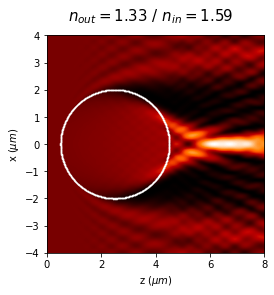

In [11]:
u1 = scattering_small_cylinder(n_out=1.33,
                               n_in=1.59,
                               r_sphere=2 * um,
                               wavelength=600 * nm)


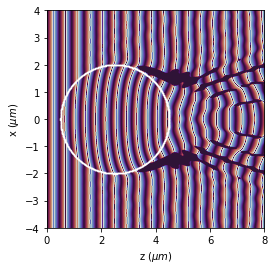

In [12]:
u1.draw(kind='phase', logarithm=False, draw_borders=True, scale='scaled')


## Scattering by a small, absorbent cylinder

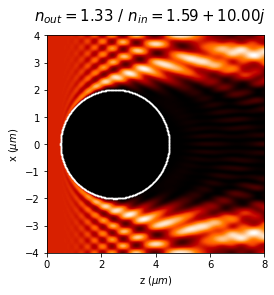

In [13]:
u1 = scattering_small_cylinder(n_out=1.33,
                               n_in=1.59 + 10j,
                               r_sphere=2 * um,
                               wavelength=600 * nm)


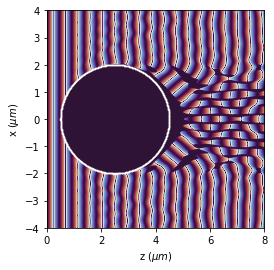

In [14]:
u1.draw(kind='phase', logarithm=False, draw_borders=True, scale='scaled')
